In [1]:
# Importing library and analysis tools
import requests 
import pandas as pd 
import scipy as stats
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Pulling Population Estimate API data from census.gov
url = "https://api.census.gov/data/2021/pep/population?"
params = {
    "get": "NAME,DENSITY_2021,POP_2021",
    "for": "state:*",
    "key": "b4e8cddedd39b4cba2d10cd09ac941213d4f6680"
}
response = requests.get(url, params=params)

if response.status_code == 200:
    pop_apijson = response.json()
else:
    print("API request failed.")

# Formatting API data into a Data Frame
pop_api = pd.DataFrame(pop_apijson)
pop_api.columns = pop_api.iloc[0]
pop_api = pop_api[1:].reset_index(drop =True)
pop_api.sort_values(by ="NAME", ascending =True, inplace =True)
pop_api.reset_index(drop =True, inplace =True)
pop_api.dropna(inplace =True)
pop_api["POP_2021"] = pop_api["POP_2021"].astype('int64')
pop_api["DENSITY_2021"] = pop_api["DENSITY_2021"].astype('float64')

In [3]:
pop_api

,NAME,DENSITY_2021,POP_2021,state
0,Alabama,99.509913,5039877,01
1,Alaska,1.283093,732673,02
2,Arizona,64.022114,7276316,04
3,Arkansas,58.194679,3025891,05
4,California,251.754362,39237836,06
5,Colorado,56.081421,5812069,08
6,Connecticut,744.556991,3605597,09
7,Delaware,514.938620,1003384,10
8,District of Columbia,10961.845722,670050,11
9,Florida,405.980418,21781128,12


In [4]:
# Importing the .csv data files.
filepaths = []
dataframes = []

basefilepath = "./data/mod/{csvfilename}mod.csv"
csvfilename = ["car","edu1","gdp","pub","unem"]

for filename in csvfilename:
    filepath = basefilepath.format(csvfilename=filename)
    filepaths.append(filepath)
    df=pd.read_csv(filepath)
    dataframes.append(df)

In [5]:
dataframes

[                   State  Registered Vehicles  Avg Cars per Household  \
 0                Alabama              5288209                    1.92   
 1                 Alaska               795274                    1.81   
 2                Arizona              5982559                    1.84   
 3               Arkansas              2902111                    1.84   
 4             California             31247270                    1.92   
 5               Colorado              5412403                    1.96   
 6            Connecticut              2878547                    1.77   
 7               Delaware              1016927                    1.81   
 8   District of Columbia                    0                    0.00   
 9                Florida             17833719                    1.70   
 10               Georgia              8594567                    1.86   
 11                Hawaii              1272361                    1.85   
 12                 Idaho             

In [6]:
# Combining all of the Data Frames created from the .csv files and API data.
main = pd.merge(dataframes[0], pop_api, left_on="State", right_on ="NAME")
main = main.merge(dataframes[1], on = "State")
main = main.merge(dataframes[2], on = "State")
main = main.merge(dataframes[3], on = "State")
main = main.merge(dataframes[4], on = "State")

In [7]:
main

,State,Registered Vehicles,Avg Cars per Household,"% With No Access, 2019",No Access,NAME,DENSITY_2021,POP_2021,state,High School Or Higher,Bachelors Or Higher,GDP Per Capita,Commute mode share (decimal),Commute mode share (percent),Unemployment Rate
0,Alabama,5288209,1.92,0.0603,6.03,Alabama,99.509913,5039877,01,86.9,26.2,50637,0.002299,0.23,3.9
1,Alaska,795274,1.81,0.0993,9.93,Alaska,1.283093,732673,02,93.1,30.0,68919,0.008672,0.87,6.6
2,Arizona,5982559,1.84,0.0597,5.97,Arizona,64.022114,7276316,04,87.9,30.3,56667,0.009383,0.94,4.8
3,Arkansas,2902111,1.84,0.0639,6.39,Arkansas,58.194679,3025891,05,87.2,23.8,51787,0.001892,0.19,3.7
4,California,31247270,1.92,0.0707,7.07,California,251.754362,39237836,06,83.9,34.7,77339,0.020680,2.07,4.2
5,Colorado,5412403,1.96,0.0514,5.14,Colorado,56.081421,5812069,08,92.1,41.6,74167,0.013222,1.32,3.3
6,Connecticut,2878547,1.77,0.0866,8.66,Connecticut,744.556991,3605597,09,90.9,40.0,84972,0.024589,2.46,4.1
7,Delaware,1016927,1.81,0.0567,5.67,Delaware,514.938620,1003384,10,90.6,32.7,61387,0.016261,1.63,3.8
8,District of Columbia,0,0.00,0.0000,0.00,District of Columbia,10961.845722,670050,11,91.9,59.8,96728,0.116184,11.62,5.6
9,Florida,17833719,1.70,0.0615,6.15,Florida,405.980418,21781128,12,88.5,30.5,63597,0.009749,0.97,3.6


In [8]:
# Cleaning, Renaming, and Reindexing the data column names to be easily read
main = main.drop([
                                    "NAME",
                                    "state",
                                    "% With No Access, 2019",
                                    "Commute mode share (decimal)"
                                    ], axis=1)
main = main.rename(columns={
                                    "Avg Cars per Household":"Cars per Houshold (AVG)",
                                    "No Access":"No Access to Cars (%)",
                                    "High School Or Higher": "High School or Higher (%)",
                                    "Bachelors Or Higher": "Bachelors or Higher (%)",
                                    "GDP Per Capita": "GDP per Capita ($)",
                                    "Commute mode share (percent)": "Uses Public Transportation (%)",
                                    "Unemployment Rate": "Unemployment Rate (%)",
                                    "DENSITY_2021":"Density (per square mile)",
                                    "POP_2021":"Population"
                                    })
main = main.reindex(columns =[
                                    "Uses Public Transportation (%)", 
                                    "State", 
                                    "GDP per Capita ($)",
                                    "Density (per square mile)",
                                    "Population",
                                    "Registered Vehicles",
                                    "Cars per Houshold (AVG)", 
                                    "No Access to Cars (%)",
                                    "Unemployment Rate (%)",
                                    "High School or Higher (%)", 
                                    "Bachelors or Higher (%)"
                                    ])

In [9]:
main

,Uses Public Transportation (%),State,GDP per Capita ($),Density (per square mile),Population,Registered Vehicles,Cars per Houshold (AVG),No Access to Cars (%),Unemployment Rate (%),High School or Higher (%),Bachelors or Higher (%)
0,0.23,Alabama,50637,99.509913,5039877,5288209,1.92,6.03,3.9,86.9,26.2
1,0.87,Alaska,68919,1.283093,732673,795274,1.81,9.93,6.6,93.1,30.0
2,0.94,Arizona,56667,64.022114,7276316,5982559,1.84,5.97,4.8,87.9,30.3
3,0.19,Arkansas,51787,58.194679,3025891,2902111,1.84,6.39,3.7,87.2,23.8
4,2.07,California,77339,251.754362,39237836,31247270,1.92,7.07,4.2,83.9,34.7
5,1.32,Colorado,74167,56.081421,5812069,5412403,1.96,5.14,3.3,92.1,41.6
6,2.46,Connecticut,84972,744.556991,3605597,2878547,1.77,8.66,4.1,90.9,40.0
7,1.63,Delaware,61387,514.938620,1003384,1016927,1.81,5.67,3.8,90.6,32.7
8,11.62,District of Columbia,96728,10961.845722,670050,0,0.00,0.00,5.6,91.9,59.8
9,0.97,Florida,63597,405.980418,21781128,17833719,1.70,6.15,3.6,88.5,30.5


In [10]:
main.sort_values(by="Uses Public Transportation (%)", ascending = False)

,Uses Public Transportation (%),State,GDP per Capita ($),Density (per square mile),Population,Registered Vehicles,Cars per Houshold (AVG),No Access to Cars (%),Unemployment Rate (%),High School or Higher (%),Bachelors or Higher (%)
32,17.26,New York,78089,420.935960,19835913,11389158,1.25,29.37,4.1,87.2,37.5
8,11.62,District of Columbia,96728,10961.845722,670050,0,0.00,0.00,5.6,91.9,59.8
30,5.87,New Jersey,78700,1260.029076,9267130,6033015,1.68,11.56,4.1,90.3,40.7
21,4.50,Massachusetts,84945,895.369530,6984723,5061260,1.62,12.42,3.3,91.1,44.5
13,3.83,Illinois,68822,228.258855,12671469,10691947,1.67,11.06,4.3,89.7,35.5
11,3.29,Hawaii,61175,224.456138,1441553,1272361,1.85,7.71,2.4,92.5,33.6
20,2.99,Maryland,70730,634.849038,6165129,4203994,1.80,9.09,3.9,90.6,40.9
38,2.79,Pennsylvania,65167,289.749786,12964056,10800315,1.69,11.00,4.3,91.0,32.3
6,2.46,Connecticut,84972,744.556991,3605597,2878547,1.77,8.66,4.1,90.9,40.0
47,2.12,Washington,75698,116.449709,7738692,7377028,1.93,7.11,4.5,91.7,36.7


In [15]:
# Statistical Analysis
mainstats = main.corr(numeric_only=True)['Uses Public Transportation (%)'].to_frame()

# Extra credit quick visual
bins = [-1, -0.5, 0, 0.5, 1]
labels = ['- - -', '-', '+', '+ + +']
mainstats['Correlation Category'] = pd.cut(mainstats['Uses Public Transportation (%)'], bins=bins, labels=labels)
mainstats.rename(columns={'Uses Public Transportation (%)': 'Correlation Value','Correlation Category':'Correlation Strength'}, inplace=True)
mainstats['Correlation Value'] = mainstats['Correlation Value'].round(4)

In [16]:
mainstats

,Correlation Value,Correlation Strength
Uses Public Transportation (%),1.0000,+ + +
GDP per Capita ($),0.6235,+ + +
Density (per square mile),0.5441,+ + +
Population,0.2290,+
Registered Vehicles,0.1199,+
Cars per Houshold (AVG),-0.7214,- - -
No Access to Cars (%),0.6510,+ + +
Unemployment Rate (%),0.2166,+
High School or Higher (%),-0.0368,-
Bachelors or Higher (%),0.5830,+ + +


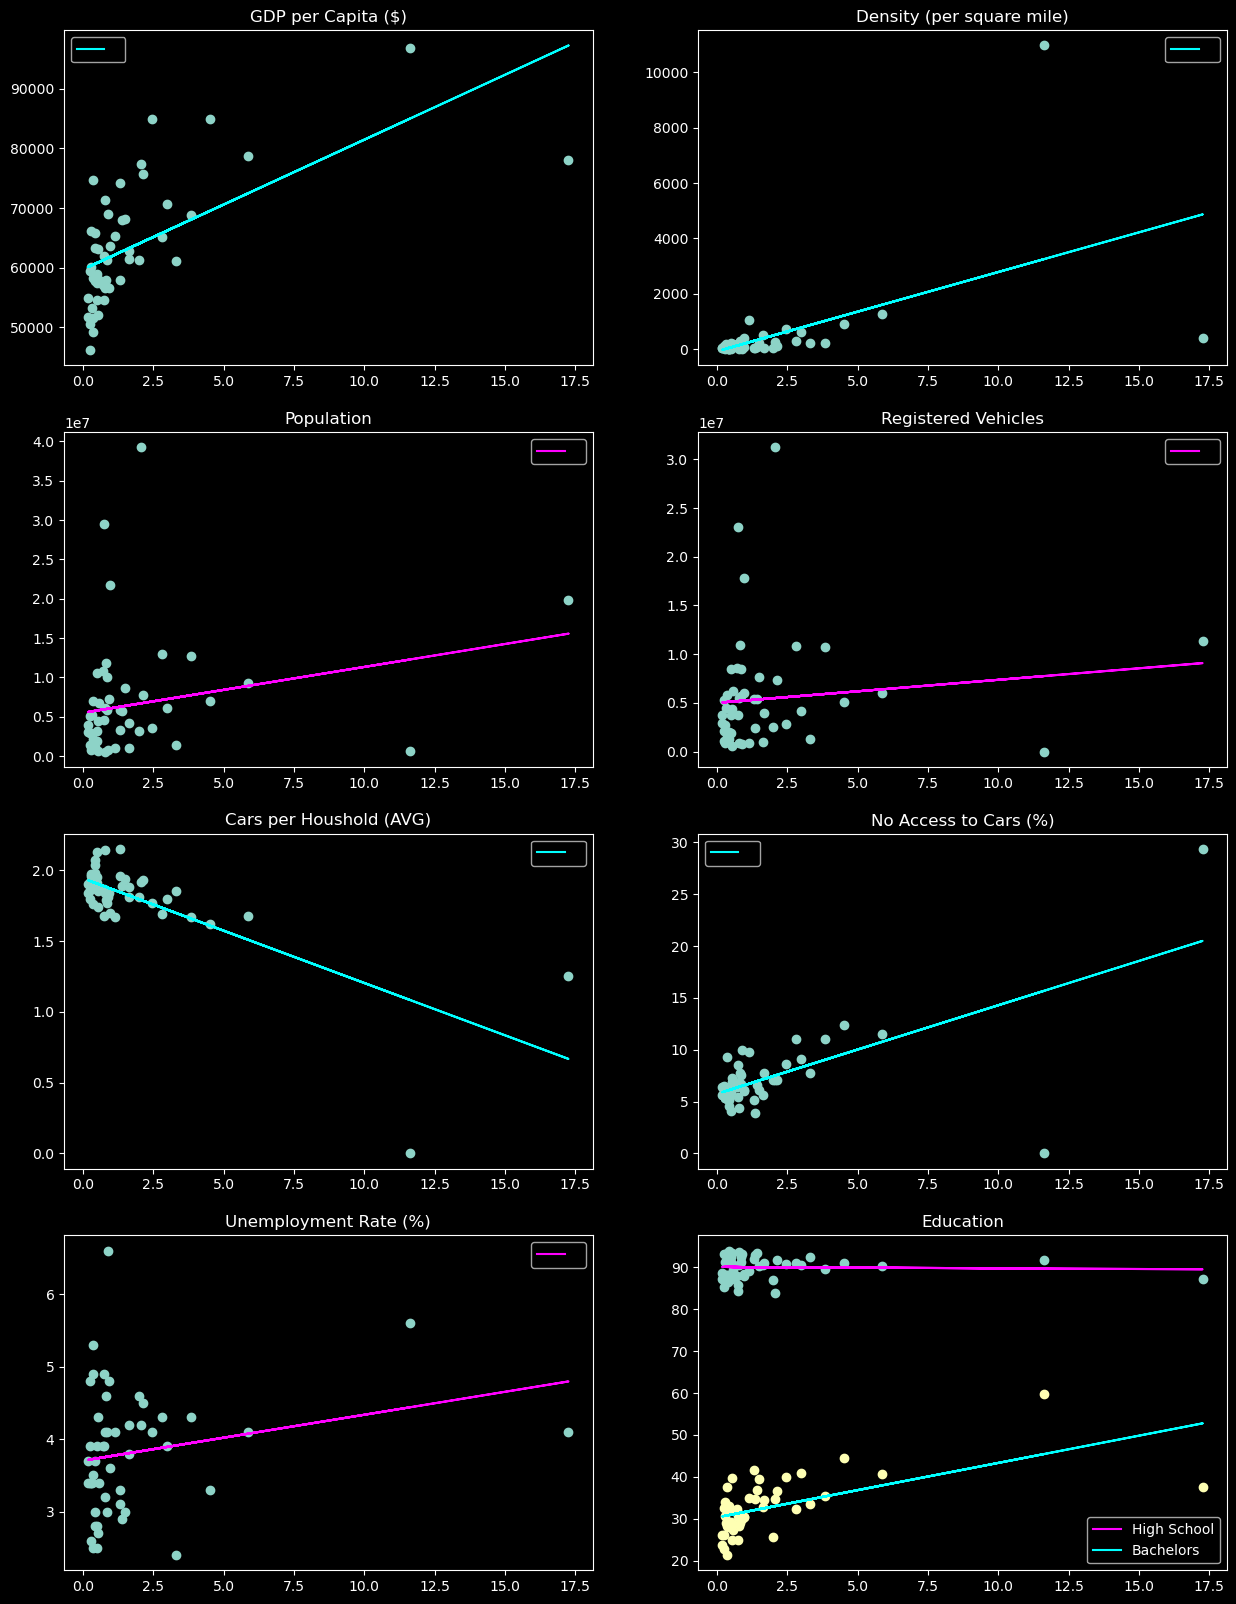

In [13]:
x = main['Uses Public Transportation (%)']
y_gdp = main['GDP per Capita ($)']
y_density = main['Density (per square mile)']
y_population = main['Population']
y_reg_vehicles = main['Registered Vehicles']
y_cars_per_household = main['Cars per Houshold (AVG)']
y_no_access_cars = main['No Access to Cars (%)']
y_unemployment_rate = main['Unemployment Rate (%)']
y_high_school_or_higher = main['High School or Higher (%)']
y_bachelors_or_higher = main['Bachelors or Higher (%)']
plt.style.use('dark_background')
plt.figure(figsize=(15, 20))

def scatter_with_trend(x, y, ylabel, title, trend_color='magenta', trend_label=' '):
    plt.scatter(x, y)
    plt.tick_params(axis='both', which='both', bottom=True, left=True, labelbottom=True, labelleft=True)
    plt.title(title)
    slope, intercept = np.polyfit(x, y, 1)
    plt.plot(x, slope * x + intercept, color=trend_color, label=trend_label)
    plt.legend()

plt.subplot(4, 2, 1)
scatter_with_trend(x, y_gdp, ' ','GDP per Capita ($)',trend_color='cyan')
plt.subplot(4, 2, 2)
scatter_with_trend(x, y_density, ' ', 'Density (per square mile)',trend_color='cyan')
plt.subplot(4, 2, 3)
scatter_with_trend(x, y_population, ' ','Population',)
plt.subplot(4, 2, 4)
scatter_with_trend(x, y_reg_vehicles, ' ', 'Registered Vehicles')
plt.subplot(4, 2, 5)
scatter_with_trend(x, y_cars_per_household, ' ','Cars per Houshold (AVG)',trend_color='cyan')
plt.subplot(4, 2, 6)
scatter_with_trend(x, y_no_access_cars, ' ','No Access to Cars (%)',trend_color='cyan')
plt.subplot(4, 2, 7)
scatter_with_trend(x, y_unemployment_rate, ' ','Unemployment Rate (%)')
plt.subplot(4, 2, 8)
scatter_with_trend(x, y_high_school_or_higher, ' ','Education',trend_label='High School')
scatter_with_trend(x, y_bachelors_or_higher, ' ','Education',trend_color='cyan',trend_label='Bachelors')

plt.show()
